# Machine Learning - Supervised learning - Classification

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploring-the-data" data-toc-modified-id="Exploring-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploring the data</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Let's-do-it" data-toc-modified-id="Let's-do-it-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Let's do it</a></span><ul class="toc-item"><li><span><a href="#Let's-train-a-model" data-toc-modified-id="Let's-train-a-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Let's train a model</a></span></li><li><span><a href="#Confusion-matrix-with-our-data" data-toc-modified-id="Confusion-matrix-with-our-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Confusion matrix with our data</a></span></li></ul></li><li><span><a href="#Dealing-with-unbalanced-data" data-toc-modified-id="Dealing-with-unbalanced-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dealing with unbalanced data</a></span><ul class="toc-item"><li><span><a href="#Unbalanced" data-toc-modified-id="Unbalanced-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Unbalanced</a></span></li><li><span><a href="#SMOTE:-oversampling" data-toc-modified-id="SMOTE:-oversampling-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>SMOTE: oversampling</a></span></li><li><span><a href="#Undersampling" data-toc-modified-id="Undersampling-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Undersampling</a></span></li><li><span><a href="#Class-weights" data-toc-modified-id="Class-weights-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Class weights</a></span></li></ul></li><li><span><a href="#We-do-the-same-with-many-predictors" data-toc-modified-id="We-do-the-same-with-many-predictors-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>We do the same with many predictors</a></span></li><li><span><a href="#Predict-proba" data-toc-modified-id="Predict-proba-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Predict proba</a></span></li><li><span><a href="#Metrics!" data-toc-modified-id="Metrics!-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Metrics!</a></span><ul class="toc-item"><li><span><a href="#Evaluation-for-REGRESSION" data-toc-modified-id="Evaluation-for-REGRESSION-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Evaluation for REGRESSION</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Confusion matrix</a></span></li><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Accuracy</a></span></li><li><span><a href="#Precision" data-toc-modified-id="Precision-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Precision</a></span></li><li><span><a href="#Recall" data-toc-modified-id="Recall-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Recall</a></span></li><li><span><a href="#Differentiating-precision-and-recall" data-toc-modified-id="Differentiating-precision-and-recall-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Differentiating precision and recall</a></span></li><li><span><a href="#F1-Score" data-toc-modified-id="F1-Score-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>F1 Score</a></span></li></ul></li><li><span><a href="#Other-classification-models" data-toc-modified-id="Other-classification-models-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Other classification models</a></span></li><li><span><a href="#We-make-predictions-and-measure" data-toc-modified-id="We-make-predictions-and-measure-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>We make predictions and measure</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Things to change to get the best ML model

- Cleaning
    - Get rid of outliers
    - Encode variables: cateorical -> numerical
    - Standarize | normalize quantitaive
    - Create new features (?)
    - Drop highly correlated ones
- Models
    - Different models
- Train / test
    - The size we want to use for the train
- CV
    - Different combinations of splitting
- Hyperparams
    - Gridsearch


In [47]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

* **regression** models are used when the target variable is **quantitative**:
  - wages
  - gas emission
  - age of the person in a photo
  
  
- ...**classification** models are used when the target variable is **qualitative**:
  - survive (or not) the Titanic
  - repay (or not) a loan
  - identify a dog (or not) in a photo
  - decide which of 3 plant species this is
  - ...

## Exploring the data

In [48]:
df = pd.read_csv("../datasets/breast_cancer.csv")

In [49]:
df.shape

(569, 31)

In [50]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [51]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'is_cancer'],
      dtype='object')

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.

a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

The target variable is `is_cancer`.

It is a categorical variable, which takes the possible values ​​$0$ and $1$

In [52]:
# Let's quickly visualize the balancing of categorical variables

<AxesSubplot:xlabel='is_cancer', ylabel='count'>

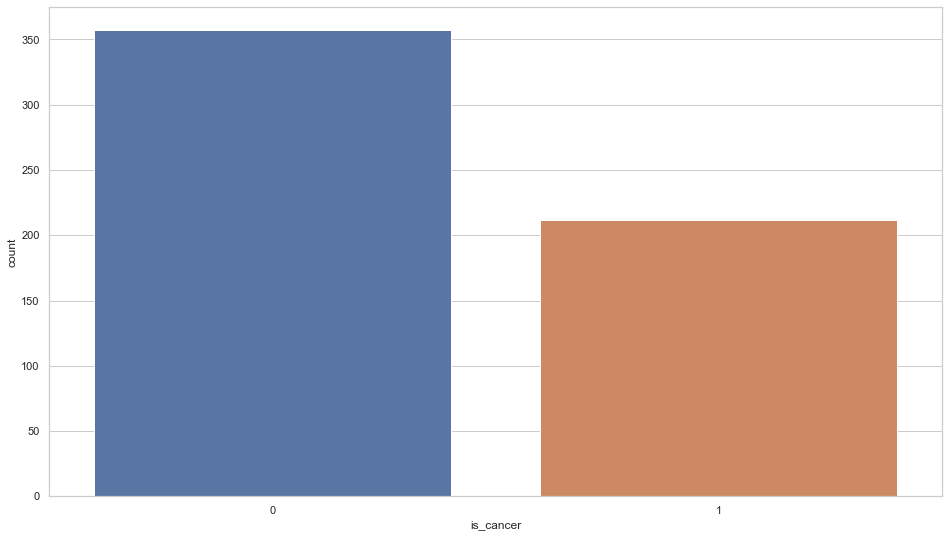

In [53]:
sns.countplot(x=df.is_cancer)

## Logistic regression
Logistic regression is one of the most popular and used algorithms for classification problems. Since it is also relatively uncomplicated and easy to implement, it is often used as a starting model, although it can also produce very high-performance results used in production. Here we are going to talk about Binomial Logistic Regression, which is used for binary results. Multinomial Logistic Regression exists and can be used for multiclass classification problems, but it is used less frequently. We will not cover it in this lesson.

Logistic regression is actually a transformed linear regression function. We can see in the image below that if we tried to fit a linear regression to some data with a binary result, we would fit a line that does not predict very well for any value that is not in the extreme values: in the middle there is a lot of area where the line is very far from the points. To make our function closer to the data, we have to transform the function we are using. In this case, it is useful to use a sigmoid function, which estimates an "S" shape. Now we can see that our line fits the data much better.

![regresiónlogística](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

In [54]:
# clf.predict_proba(X[:2, :])
# 0, 1
# get probability

Refs:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html     
https://techdifferences.com/difference-between-linear-and-logistic-regression.html    
https://stackoverflow.com/questions/12146914/what-is-the-difference-between-linear-regression-and-logistic-regression

## Let's do it

Let's try to predict `is_cancer` using only `mean_radius` as a predictor.

In [55]:
df = df[["mean_radius","is_cancer"]]

In [56]:
df.sample(5)

,mean_radius,is_cancer
450,11.87,0
62,14.25,1
423,13.66,0
135,12.77,1
400,17.91,1


### Let's train a model

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log = LogisticRegression() # not any params so far

In [59]:
X = df[["mean_radius"]]

In [60]:
y = df["is_cancer"]

In [61]:
log.fit(X,y)

LogisticRegression()

In [62]:
# Let's see how it would work with the first 5 patients

In [63]:
df.sample(10)

,mean_radius,is_cancer
504,9.268,0
133,15.710,0
370,16.350,1
64,12.680,1
298,14.260,0
62,14.250,1
31,11.840,1
453,14.530,0
562,15.220,1
106,11.640,0


In [64]:
df_reduced = df[0:5]
display(df_reduced)

,mean_radius,is_cancer
0,17.99,1
1,20.57,1
2,19.69,1
3,11.42,1
4,20.29,1


In [65]:
# A trained model is a "prediction machine"

In [66]:
df_reduced["prediction"] = log.predict(df_reduced[["mean_radius"]])

In [67]:
df_reduced

,mean_radius,is_cancer,prediction
0,17.99,1,1
1,20.57,1,1
2,19.69,1,1
3,11.42,1,0
4,20.29,1,1


In [68]:
df["prediction_cancer"] = log.predict(df[["mean_radius"]])

In [69]:
df.sample(10)

,mean_radius,is_cancer,prediction_cancer
560,14.050,0,0
152,9.731,0,0
567,20.600,1,1
205,15.120,1,1
503,23.090,1,1
346,12.060,0,0
55,11.520,0,0
452,12.000,0,0
12,19.170,1,1
355,12.560,0,0


### Confusion matrix with our data

In [70]:
pd.crosstab(
    df.is_cancer,
    df.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,333,24
1,45,167


* 333 - We have predicted NO and it is NO
* 24 - We have predicted YES and it is No
* 45 - We have preached NO and it is YES
* 167 - We have predicted YES and it is Yes

In [71]:
import numpy as np
x = np.linspace(df.mean_radius.min(), df.mean_radius.max(), 100)
y = log.predict(x.reshape(-1,1))

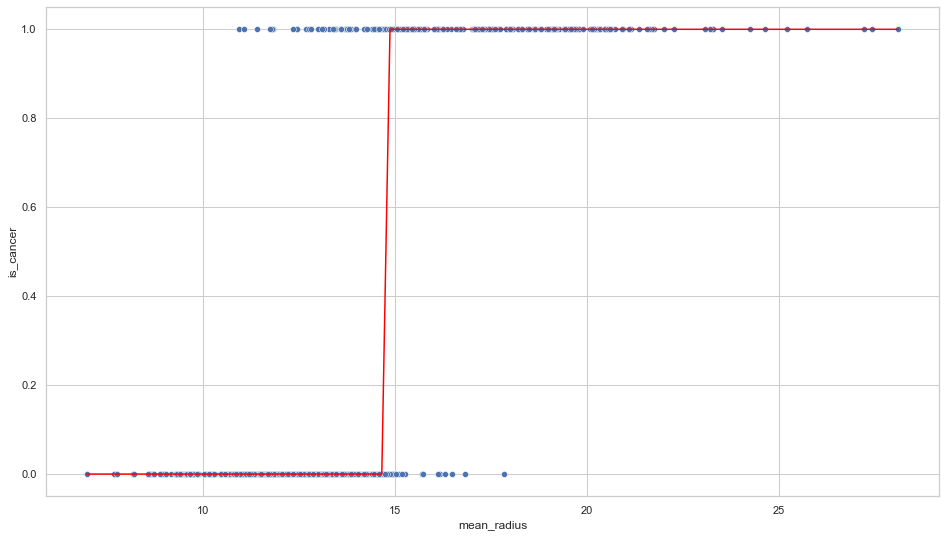

In [72]:
sns.scatterplot(x=df.mean_radius, y=df.is_cancer)
plt.plot(x,y,c="red")

## Dealing with unbalanced data

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [73]:
from sklearn.model_selection import train_test_split

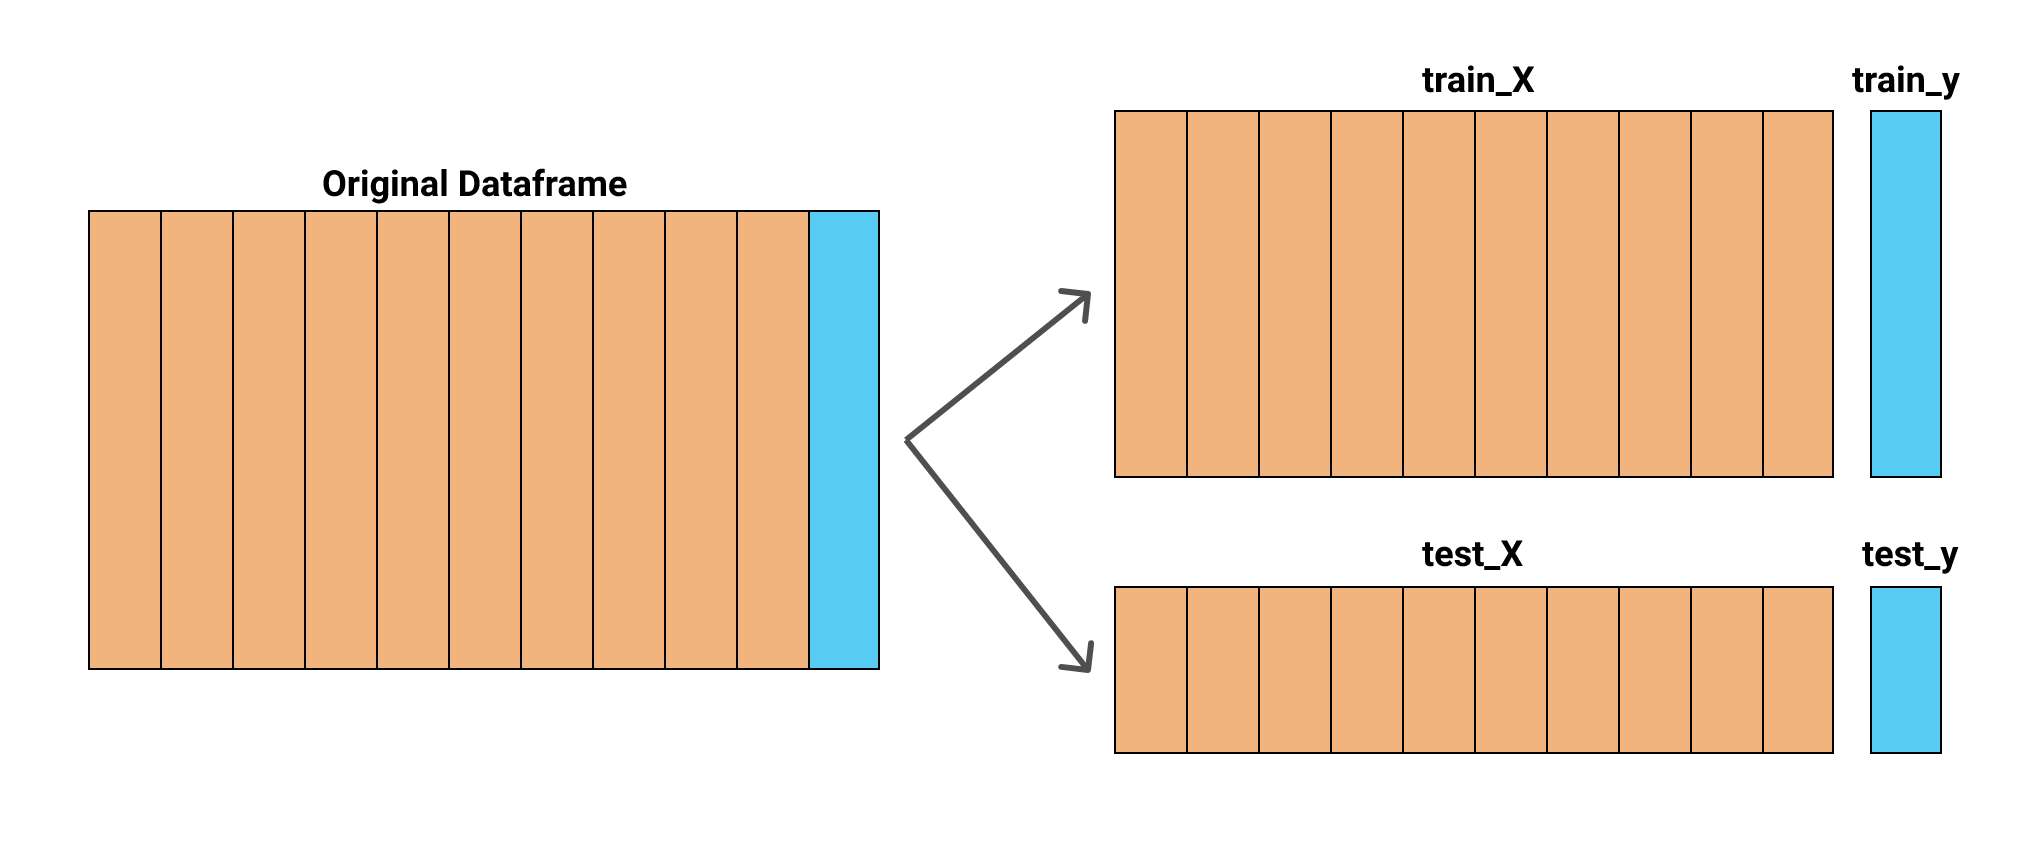

In [74]:
X = df.drop(columns="is_cancer")
y = df.is_cancer

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix

### Unbalanced

In [77]:
log.fit(X_train,y_train)

LogisticRegression()

In [78]:
y_pred = log.predict(X_test)

In [79]:
accuracy_score(
y_test,
y_pred)

0.9210526315789473

### SMOTE: oversampling

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix

In [81]:
#pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

model_over = log.fit(X_train_over,y_train_over)
y_pred = model_over.predict(X_test)


accuracy_score(
y_test,
y_pred)

0.8859649122807017

### Undersampling

In [82]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

model_under = log.fit(X_train_un, y_train_un)
y_pred = model_under.predict(X_test)


accuracy_score(
y_test,
y_pred)

0.8947368421052632

### Class weights

In [83]:
rf_estimator = LogisticRegression(class_weight="balanced")


model_weighted = rf_estimator.fit(X_train, y_train)
y_pred = model_weighted.predict(X_test)


accuracy_score(
y_test,
y_pred)

0.8859649122807017

## We do the same with many predictors

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
data = pd.read_csv("../datasets/breast_cancer.csv")

In [86]:
X = data.drop(columns="is_cancer")
y = data.is_cancer

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [88]:
log = LogisticRegression(class_weight="balanced")

In [89]:
log.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [90]:
y_pred = log.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1])

## Predict proba

In [91]:
data_2 = data.copy()
data_2

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [92]:
X = data_2.drop(columns="is_cancer")
y = data_2.is_cancer
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [93]:
# THE PROBABILITY THAT IT IS 0 AND THE PROBABILITY THAT IT IS 1

In [94]:
y_prob = log.predict_proba(X_test[:-1])
y_prob[:5]

array([[9.89353354e-01, 1.06466458e-02],
       [9.99728575e-01, 2.71424966e-04],
       [9.99432620e-01, 5.67379894e-04],
       [5.54304158e-01, 4.45695842e-01],
       [3.27245539e-05, 9.99967275e-01]])

In [96]:
y_prob[0][0] > y_prob[0][1]

True

In [97]:
y_prob[0][0]

0.9893533541822487

## Metrics!

### Evaluation for REGRESSION
- r2, r2 adjusted: how good my model is, 0-1
- RMSE
- MSE
- MAE

Generally: value of my prediction, check the difference to my actual value: number, average, sqrt, square

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix

### Confusion matrix

Confusion Matrix
We are going to explain how the confusion matrix works with a hypothetical marketing example. In this example, we contact 100 customers and 80 of them tell us that they are not interested and 20 of them that they are.

Our model (in the example) is not very good, although depending on what metric we use, it might appear to be better than it is.

We have used as values ​​of the binary classification:

- 0: not interested
- 1: yes you are interested

![confusion matrix](https://www.iartificial.net/wp-content/uploads/2019/11/Matriz-Confusion-Ejemplo.webp)

In the confusion matrix on the left you can see the values ​​for this example. In the confusion matrix on the right, the generic names when we use the English nomenclature: True Negative [TN], True Positive [TP], False Positive [FP], False Negative [FN].

Tip: to easily remember the confusion matrix:

Positive (Positive) or Negative (Negative): refers to the prediction. If the model predicts 1 then it will be positive, and if it predicts 0 it will be negative.
True (True) or False (False): refers to whether the prediction is correct or not.

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/conf_matrix.png">

Equivalent with sklearn

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
confusion_matrix(
y_test,
y_pred)

array([[43, 30],
       [22, 19]])

In [101]:
pd.crosstab(
    y_test,
    y_pred
)

col_0,0,1
is_cancer,,
0,43,30
1,22,19


### Accuracy

Accuracy measures the percentage of cases that the model has got right. This is one of the most used and favorite metrics… that I recommend you avoid! The problem with accuracy is that it can lead to deception, that is, it can make a bad model appear to be much better than it is.
The problem of using accuracy on unbalanced data.....

• Example: In a data set with 990 positives and 10
negatives, a classifier that always predicts “positive”,
would have a 0.99 hit rate And yet it's bad!

Represents the proportion of samples correctly predicted
 * The most common metric for ranking 🤔👀
 * It is useful when
  - the data set has balanced classes (similar proportion of True and False)
  - there is symmetry between True and False (for example, prediction of "male" or "female")
 * **Often misused!** since:
  - many problems are not symmetrical (for example, cancer vs. non-cancer)

The accuracy is calculated with the following formula:

$$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [102]:
accuracy_score(
y_test,
y_pred)

0.543859649122807

Interpreting this metric, we see that the model has been correct 96% of the diagnoses, that is, it will be wrong 4% of the times it predicts.

### Precision

With the precision metric we can measure the quality of the machine learning model in classification tasks. In the example, it means that accuracy is the answer to the question: what percentage of the customers we contact will be interested?

To calculate the precision we will use the following formula:

$$precision = \frac{TP}{TP + FP}$$

It is the fraction of predicted positive events that are actually positive as shown below

This metric is defined as the number of true positive cases over the total number of everything you said was positive. In other words, of everything that the algorithm predicted as positive, it evaluates how much of it was true. One of the examples proposed [here](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9) is to mark an email as spam, when it really was not. Imagine that an anti-spam system has a low precision and marks an email as spam even though it is not, and you end up not reading your sister's wedding invitation.
One of the cases where this metric can be used, as the post says, is when the number of false positives has a very important impact. Imagine a classifier that mistakes a diagnosis and you end up amputating a patient's healthy leg.

This image marks the data sets selected when calculating precision.

<img src="https://www.iartificial.net/wp-content/uploads/2019/11/precision.webp">

Precision = Percentage of POSITIVE predictions that were correct.
What proportion of the predicted Positives is actually Positive?
We have to look at the total number of predicted Positives (True Positives plus False Positives, TP+FP), and see how many of them are True Positives (TP).

In [103]:
precision_score(
y_test,
y_pred)

0.3877551020408163

### Recall

The recall metric will inform us about the amount that the machine learning model is capable of identifying. In the example, it refers to the fact that recall is the answer to the question: what percentage of customers are interested are we able to identify?

To calculate recall we will use the following formula:

$$recall = \frac{TP}{TP + FN}$$

<img src="https://www.iartificial.net/wp-content/uploads/2019/11/recall-exhaustividad.webp">

It answers a different question: what proportion of real positives is correctly classified?
Percentage of positive cases that I have captured.

In [104]:
recall_score(
y_test,
y_pred)

0.4634146341463415

### Differentiating precision and recall
Despite being similar, they have subtle distinctions.

- Precision: How many times is what my model says really true?
- Recall: How many times is my model able to identify the truth?

Precision focuses on what the model says and then compares it to reality. On the other hand, recall starts from reality, and then evaluates how good the model is at recognizing it.

### F1 Score

The F1 value is used to combine the precision and recall measurements into a single value. This is handy because it makes it easier to compare the combined accuracy and recall performance between various solutions.

F1 is calculated by taking the harmonic mean between precision and recall:

$$F1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$

In [105]:
f1_score(df.is_cancer,df.prediction_cancer)

0.8287841191066998

- Accuracy: measures the percentage of cases that the model has got right. How many Positives and negatives i was able to get right
- Precision: positive events that are actually positive. Positive: how many did I get
- Recall: how many out of all the positives we're able to identify
- F1: precision & recall
    
        
- Accuracy & F1


More to read on:
- https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
- https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/
- https://wiki.pathmind.com/accuracy-precision-recall-f1
- https://datasmarts.net/es/beyond-accuracy-precision-recall-y-f1/

## Other classification models

More literature on this [link](https://pharos.sh/vision-general-de-los-metodos-de-clasificacion-en-python-con-scikit-learn/)

In [106]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [108]:
models={
    'dis': LinearDiscriminantAnalysis(),
    'neighbors': KNeighborsClassifier(),
    'naive': GaussianNB(),
    'tree': DecisionTreeClassifier(),
    'svm': SVC(),
}

In [109]:
for name, model in models.items():
    print("training ", name)
    model.fit(X_train, y_train)

training  dis
training  neighbors
training  naive
training  tree
training  svm


## We make predictions and measure

In [110]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--------{name}--------")
    print("Accuracy: ", accuracy_score(y_test,y_pred))
    print("Precision: ", precision_score(y_test,y_pred))
    print("Recall: ", recall_score(y_test,y_pred))
    print("F1: ", f1_score(y_test, y_pred))

--------dis--------
Accuracy:  0.956140350877193
Precision:  1.0
Recall:  0.8780487804878049
F1:  0.9350649350649352
--------neighbors--------
Accuracy:  0.9473684210526315
Precision:  0.926829268292683
Recall:  0.926829268292683
F1:  0.926829268292683
--------naive--------
Accuracy:  0.9473684210526315
Precision:  0.9069767441860465
Recall:  0.9512195121951219
F1:  0.9285714285714286
--------tree--------
Accuracy:  0.9035087719298246
Precision:  0.8571428571428571
Recall:  0.8780487804878049
F1:  0.8674698795180722
--------svm--------
Accuracy:  0.9385964912280702
Precision:  0.9473684210526315
Recall:  0.8780487804878049
F1:  0.9113924050632912


## Summary
It's your turn, what have we learned today?

- Classification task: 0, 1
- Binary classifications: logisict regression instead of a linear one
- Unbalanced data: 
    - Not do anything: not ideal
    - Oversamplit: SMOTE
    - Undersampling: reducing the big category
    - class_weight="balanced" -> from sklearn
- model.predict_proba(): the probability of something being 0 and 1: total of 1
- How good is my model:

    - confustion matrixes
    - Accuracy, precision, recall, F1
    
- H20: autoML
    - Pipelines for my models
    - Choosing and finding the best hyperparams, models, splits, etc

- Decision trees
- Unsupervised ML

- Streamlit
- Tableau